# Úkol č. 2 - Využití neuronových sítí

  * Termíny jsou uvedeny na [courses.fit.cvut.cz/BI-ML2/homeworks/index.html](https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html).
  * Pokud odevzdáte úkol po prvním termínu ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu musíte sestrojit vhodný model neuronové sítě pro vícetřídou klasifikaci.
  * Část bodů získáte za správné vypracování a část bodů získáte za výslednou přesnost Vašeho modelu na evaluačních datech.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 32x32 pixelů ve stupních šedi, které byly nějakým způsobem vyrobeny z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování (max 18 bodů)

**Body zadání**, za jejichž (poctivé) vypracování získáte **18 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Sestrojte a natrénujte několik variant modelu dopředné neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.
<br/><br/>
  * Sestrojte model konvoluční neuronové sítě. Přitom v rámci výpočetních možností:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Experimentujte s různými hloubkami a velikosmi vrstev.
      * Experimentujte se standardizací/normalizací dat.
      * Experimentujte s různými optimalizačními metodami.
      * Experimentujte s různými regularizačními technikami.
      * Získané výsledky vždy řádně okomentujte.
    <br/><br/>
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **label** a identifikátory do sloupce **ID**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Vyhodnocovací část (max 7 bodů)
Za přesnost (accuraccy) na odevzdaných predikcích pro vyhodnocovací množnu získáte dalších max **7 bodů**.

Označíme-li $A$ přesnost, které jste dosáhli, zaokrouhlenou na 2 desetinná místa, akumulují se výsledné body podle následujících pravidel:
* pokud $A \geq 0.80$ obdržíte +1 bod
* pokud $A \geq 0.83$ obdržíte +1 bod
* pokud $A \geq 0.86$ obdržíte +1 bod
* pokud $A \geq 0.87$ obdržíte +1 bod
* pokud $A \geq 0.88$ obdržíte +1 bod
* pokud $A \geq 0.89$ obdržíte +1 bod
* pokud $A \geq 0.90$ obdržíte +1 bod

**Příklad:** Pokud bude Vaše přesnost 0.856, vyjde A = 0.86 a vy získáte 3 body.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

# Homework

This homework was done on Kaggle for its free GPUs. It should be compatible with version on gitlab runned on CPU.

## Importing modules & reading dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

RND_SEED = 789
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Cell bellow copies data from standard Kaggle into home directory.

In [2]:
!cp ../input/mnist-ml2-ls25/* .
!ls

evaluate.csv  __notebook__.ipynb  train.csv


The dataset will be split into three parts training, validation and test with 80%/10%/10% respective proportions. We have a large number of samples, so we stress training dataset more, because validation and test accuracy estimations will not differ much between 10K and 5K samples.

In [3]:
from sklearn.model_selection import train_test_split

target_col = 'label'
data = pd.read_csv('train.csv')

X = data.drop(columns=[target_col])
y = data[target_col]

Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.2, random_state=RND_SEED, shuffle=True
)

Xval, Xtest, yval, ytest = train_test_split(
    Xtest, ytest, test_size=0.5, random_state=RND_SEED, shuffle=True
)


print(f"Xtrain shape: {Xtrain.shape}");
Xtrain.head()

Xtrain shape: (42000, 1024)


,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1015,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024
9162,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
17405,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Analysis

From datset descriptions we obtain following **label** description

* 0 = T-shirt/top
* 1 = Trouser
* 2 = Pullover
* 3 = Dress
* 4 = Coat
* 5 = Sandal
* 6 = Shirt
* 7 = Sneaker
* 8 = Bag
* 9 = Ankle boot

Let us display several images.

In [4]:
LEN_SIDE = 32

In [5]:
def display_img(ax, x, y, kw_imshow = dict(cmap='binary', vmin=0, vmax=255), prefix_label='Label: '):
    x_ = x.reshape(LEN_SIDE, LEN_SIDE)
    ret = ax.imshow(
        x_, 
        **kw_imshow
    )
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(f"{prefix_label}{y}")
    return ret

def display_gallery(X, Y, rename_label=True):
    labels = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
    n = int(np.sqrt(X.shape[0]))
    m = int(np.ceil(X.shape[0] / n))
    fig, axes = plt.subplots(n, m, figsize=(m*3, n*3.))

    for ax, x, y in zip(axes.flatten(), X.iterrows(), Y):
        if rename_label:
            y = labels[y]
        display_img(ax, x[1].values, y)
    for ax in axes.flatten()[X.shape[0]:]:
        ax.remove()

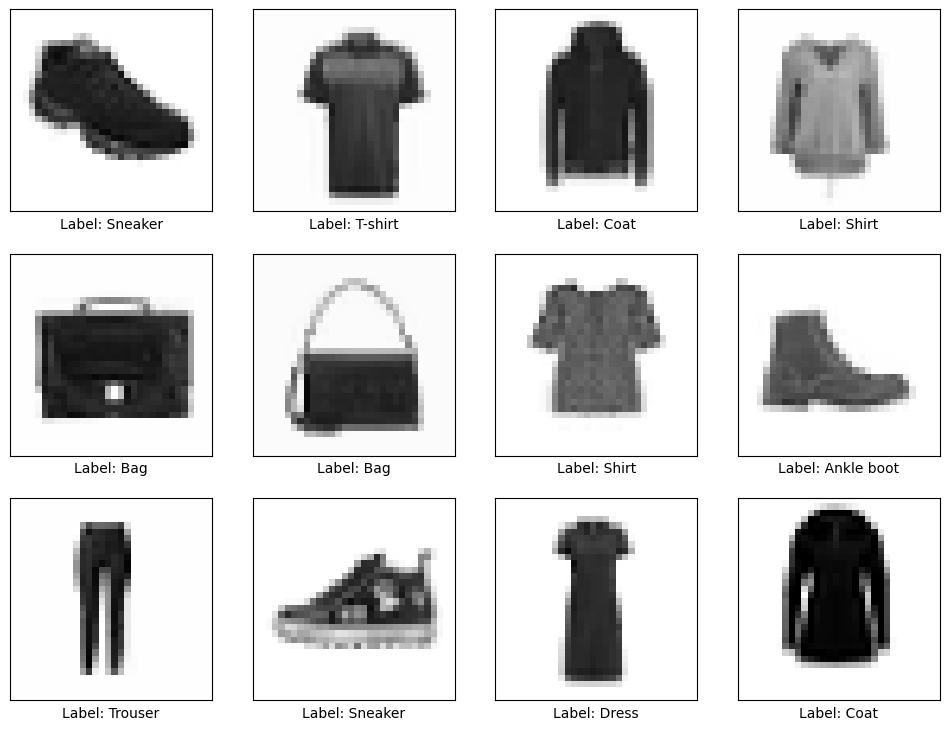

In [6]:
display_gallery(Xtrain.tail(12), ytrain.tail(12))

Images follow their labels. What could possibly cause trouble for neural nets is variation in subtypes and photos. For example there are two points of view that capture sneakers and a suitcase and a ridicule both labeled *Bag* in the display above.

Below we will check for labels' presence and balances of classes accross dataset.

In [7]:
labels = np.sort(ytrain.unique())
label_rates = ytrain.groupby(ytrain).count() / ytrain.shape[0]
N_LABELS = len(labels)
print(f"Present labels are: {labels}")
print(f"Label rates: {label_rates}")

Present labels are: [0 1 2 3 4 5 6 7 8 9]
Label rates: label
0    0.100738
1    0.098357
2    0.101524
3    0.100595
4    0.100167
5    0.100952
6    0.101095
7    0.097810
8    0.097405
9    0.101357
Name: label, dtype: float64


Every class occures as frequently as every other, so we can say that our dataset is balanced.

Let us plot average item and deviations of pixels in dataset and separate classes.

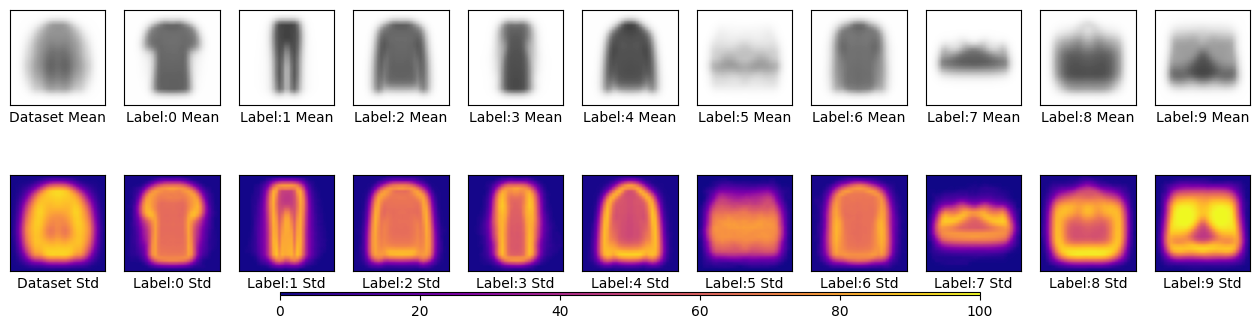

In [8]:
from matplotlib.cm import ScalarMappable
fig, [axm, axs] = plt.subplots(2, len(labels) + 1, figsize=(16, 4))


display_img(axm[0],  Xtrain.mean().values, 'Dataset Mean', prefix_label='')
for i in labels:
    display_img(axm[i + 1], Xtrain[ytrain == i].mean().values, f'Label:{i} Mean', prefix_label='')

display_img(axs[0],  Xtrain.std().values, 'Dataset Std', kw_imshow={'cmap':'plasma', 'vmin':0, 'vmax':100}, prefix_label='')
for i in labels:
    display_img(axs[i + 1], Xtrain[ytrain == i].std().values, f'Label:{i} Std', kw_imshow={'cmap':'plasma', 'vmin':0, 'vmax':100}, prefix_label='')

sm = ScalarMappable(cmap='plasma')
sm.set_clim(0, 100)
_=fig.colorbar(
    sm,
    ax=axs,
    location='bottom',
    aspect=200,
    fraction=0.025
)

We see that dataset mean is an amorphous blob with high variation, but zooming into different classes present distibguishable silhoutes with variative borders. Exceptions are labels *5*, *7* and *9*, those labels correspond to different types of footwear. It was noted above that two samples had different format of photo. Similiar thing is present here. Photos of footwear is taken with item being oriented leftwards or rightwards, that adds another layer of variability and unclearness.  

Let's try to display whole datset using **tSNE**, a manifold-learning tool for visualisation high-dimensional data.

In [9]:
np.random.seed(RND_SEED)
idx = pd.Index(np.random.choice(ytrain.index, 2000))
ysample = ytrain.loc[idx]
Xsample = Xtrain.loc[idx]

In [10]:
from sklearn.manifold import TSNE

Xembedded = TSNE(perplexity=20, n_jobs=-1).fit_transform(Xsample)
print(f"Shape of embedded dataset: {Xembedded.shape}")
Xembedded[:2]

Shape of embedded dataset: (2000, 2)


array([[ 0.45008174, 29.178661  ],
       [10.220523  , 42.839695  ]], dtype=float32)

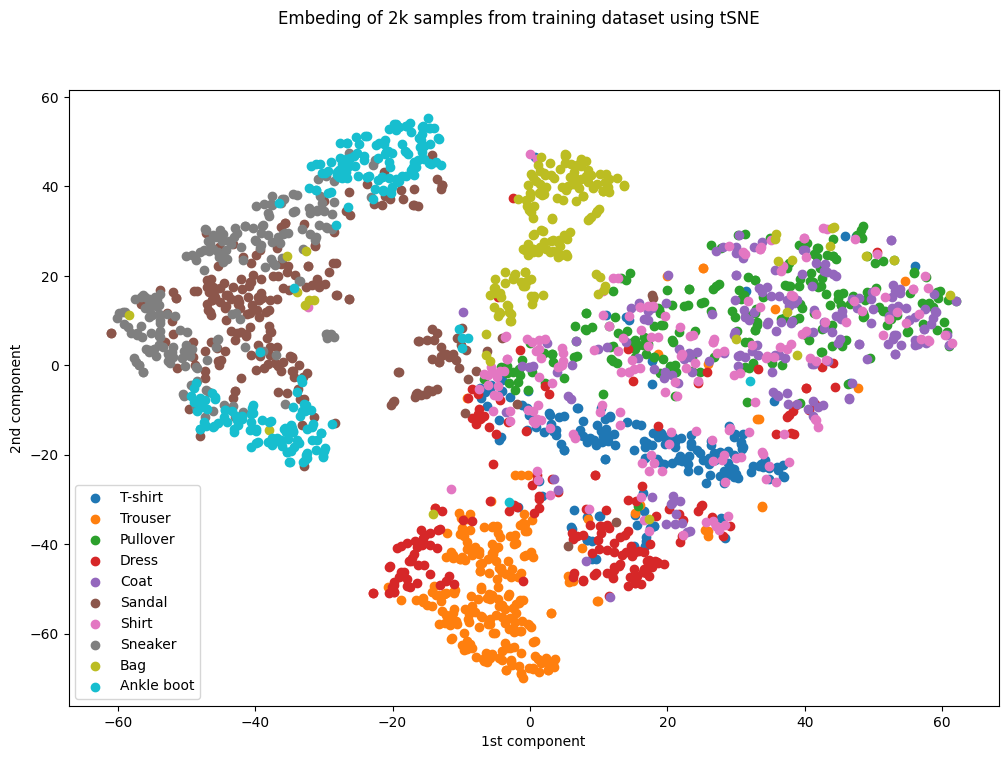

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))

for i, label in enumerate(["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]):
    ax.scatter(Xembedded[ysample == i, 0], Xembedded[ysample == i, 1], label=label)

ax.set_ylabel("2nd component")
ax.set_xlabel("1st component")
fig.suptitle("Embeding of 2k samples from training dataset using tSNE")
_=ax.legend()

This visualisation tells nothing of a real matter, but it is still interesting to see blue-gray-brown gradient of footwear on the left (two-sided, most probably due to boot orientation disscussed above), lonely island of bags in the center and highly intersected areas of different tops.

## Training

We will use PyTorch for neural networks, so data should be transformed into PyTorch's dataset. Samples in dataset will have dimensions $1\times32\times32$, instead of flattened column vector.

In [12]:
train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(Xtrain.values.reshape(-1, 1, 32, 32), dtype=torch.float).to(device),
    torch.tensor(ytrain.values, dtype=torch.long).to(device)
)

val_dataset = torch.utils.data.TensorDataset(
    torch.tensor(Xval.values.reshape(-1, 1, 32, 32), dtype=torch.float).to(device),
    torch.tensor(yval.values, dtype=torch.long).to(device)
)

print(f"Training dataset length:   {len(train_dataset)}")
print(f"Validation dataset length: {len(val_dataset)}")

Training dataset length:   42000
Validation dataset length: 5250


We will also include standardized datasets. We will subtract mean and divide by standard deviation of trained dataset, because those are trained values for our model.

In [13]:
train_dataset_std = torch.utils.data.TensorDataset(
    torch.tensor(((Xtrain - Xtrain.mean()) / Xtrain.std()).values.reshape(-1, 1, 32, 32), dtype=torch.float).to(device),
    torch.tensor(ytrain.values, dtype=torch.long).to(device)
)

val_dataset_std = torch.utils.data.TensorDataset(
    torch.tensor(((Xval - Xtrain.mean()) / Xtrain.std()).values.reshape(-1, 1, 32, 32), dtype=torch.float).to(device),
    torch.tensor(yval.values, dtype=torch.long).to(device)
)

print(f"Training dataset length:   {len(train_dataset_std)}")
print(f"Validation dataset length: {len(val_dataset_std)}")

Training dataset length:   42000
Validation dataset length: 5250


Further we will use PyTorch's Dataloader in training and validation loop. We will chose **batch size** of **256**, the value lies on the further border of conventional batch sizes, but if we want to leverage power of GPU on such small dataset (by deep learning ruler), the batch size must be quite large.

In [14]:
BATCH_SIZE = 256
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader   = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)


train_std_loader = torch.utils.data.DataLoader(train_dataset_std, batch_size=BATCH_SIZE, shuffle=True)
val_std_loader   = torch.utils.data.DataLoader(val_dataset_std, batch_size=BATCH_SIZE, shuffle=False)

Futher we will use **Early stopping** to train the nets. We will follow validation loss and when it is not decreasing we will increment a counter. When counter reaches *tolerance* training should be stopped.

In [15]:
class EarlyStopper:

    def __init__(self, tolerance):
        self.counter = 0
        self.min = float('+inf')
        self.tolerance = tolerance

    def __call__(self, val) -> bool:
        """
            Returns true if training should be stopped
        """
        if self.min > val:
            self.min = val
            self.counter = 0
            return False
        self.counter += 1
        return self.counter >= self.tolerance

Below is a function to do one epoch of model. It will return *training loss* and *accuracy*. 

In [16]:
def train_one_epoch(model, optimizer, loss_fn, train_loader) -> tuple[float, float]:
    accumulated_loss = 0
    accumulated_correct_pred = 0
    total_samples = 0
    model.train()

    for data, label in train_loader:
        total_samples += data.shape[0]
        
        optimizer.zero_grad()
        pred = model(data)
        loss = loss_fn(pred, label)
        loss.backward()
        optimizer.step()

        accumulated_loss += data.shape[0] * loss.item()
        accumulated_correct_pred += (pred.argmax(dim=1) == label).sum().item()
    return accumulated_loss / total_samples, accumulated_correct_pred / total_samples

Next function is a function that runs a model through validation dataset and returns *validation loss* and *accuracy*. Decorator ```@torch.no_grad``` guarantees that no gradient is computed through in the function.

In [17]:
@torch.no_grad
def validate(model, loss_fn, val_loader) -> tuple[float, float]:
    accumulated_loss = 0
    accumulated_correct_pred = 0
    total_samples = 0
    model.eval()

    for data, label in val_loader:
        total_samples += data.shape[0]
        pred = model(data)
        loss = loss_fn(pred, label)
        accumulated_loss += data.shape[0] * loss.item()
        accumulated_correct_pred += (pred.argmax(dim=1) == label).sum().item()

    return accumulated_loss / total_samples, accumulated_correct_pred / total_samples

Lastly the function that will train the model and log data.

In [18]:
def train_model(
        model, optimizer_cls, epochs, early_stopper=None, 
        optimizer_kwargs={}, loss_fn=nn.CrossEntropyLoss(),
        lr_scheduler_cls=None, lr_scheduler_kwargs={}, lr_sch_pass_val_loss=False,
        train_loader=train_loader, val_loader=val_loader,
        display_cldw=10
    ):

    optimizer = optimizer_cls(model.parameters(), **optimizer_kwargs)
    lr_scheduler = lr_scheduler_cls(optimizer, **lr_scheduler_kwargs) if lr_scheduler_cls else None
    tlosss, taccs = [], []
    vlosss, vaccs = [], []
    print("| Epoch || Loss                    || Accuracy                |")
    print("|       || Training   | Validation || Training   | Validation |")
    print("|-------||------------|------------||------------|------------|")
    
    for epoch in range(epochs):
        tloss, tacc = train_one_epoch(model, optimizer, loss_fn, train_loader)
        vloss, vacc = validate(model, loss_fn, val_loader)

        tlosss.append(tloss)
        taccs.append(tacc)
        vlosss.append(vloss)
        vaccs.append(vacc)

        if epoch == (epochs - 1):
            print("| Finished |--------------------------------------------------|")
            print(f"| {epoch:>5} || {tloss:>10.7f} | {vloss:>10.7f} || {tacc:>10.7f} | {vacc:>10.7f} |")
        if epoch % display_cldw == 0:
            print(f"| {epoch:>5} || {tloss:>10.7f} | {vloss:>10.7f} || {tacc:>10.7f} | {vacc:>10.7f} |")
        if early_stopper and early_stopper(vloss):
            print("| Early Stopping |---------------------------------------------|")
            print(f"| {epoch:>5} || {tloss:>10.7f} | {vloss:>10.7f} || {tacc:>10.7f} | {vacc:>10.7f} |")
            break
        if lr_scheduler:
            if lr_sch_pass_val_loss:
                lr_scheduler.step(vloss)
            else:
                lr_scheduler.step()

    fig, [axl, axa] = plt.subplots(1,2,figsize=(9, 4))
    epochs = len(tlosss)
    axl.plot(range(epochs), tlosss, c='blue',   label='Training loss')
    axl.plot(range(epochs), vlosss, c='orange', label='Validation loss')
    axl.set_title("Loss Learning Curve")
    axl.legend()

    
    axa.plot(range(epochs), taccs, c='blue',   label='Training accuracy')
    axa.plot(range(epochs), vaccs, c='orange', label='Validation accuracy')
    axa.set_ylim(0.5, 1)
    axa.set_yticks(np.arange(0.5, 1.05, step=0.05))
    axa.set_title("Accuracy Learning Curve")
    axa.legend()
    
    return fig

models = []

Postsciptum to training is function ```init_weights```, that initializes linear layers with uniform Xavier and biases for numerical zero. Default PyTorch initialization is Kaiming uniform and biases to be zeroed out.

In [19]:
# Stolen from https://stackoverflow.com/questions/49433936/how-do-i-initialize-weights-in-pytorch
def init_weights(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            m.bias.data.fill_(0.01) # Small number rather than zero for numerical stability

With this toolkit we are ready to train neural network classifiers.

Loss function will be a categorical cross entropy, that corresponds to maximizing accuracy.

## Feedforward

Feed forward nets are relatively simple and very generic.

### 1 Hidden Layer Net

We will start with a net with single hidden layer and a ReLU activation function.

In [20]:
torch.manual_seed(RND_SEED)
ff1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(LEN_SIDE ** 2, 32),
    nn.ReLU(),
    nn.Linear(32, N_LABELS),
    nn.Softmax(1)
).to(device)
ff1.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=1024, out_features=32, bias=True)
  (2): ReLU()
  (3): Linear(in_features=32, out_features=10, bias=True)
  (4): Softmax(dim=1)
)

We will use **SGD** optimizer with **learning rate 0.01** and **tolerance** for early stopping of **15** epochs. This is the most simple way to learn neural net with early stopping.

| Epoch || Loss                    || Accuracy                |
|       || Training   | Validation || Training   | Validation |
|-------||------------|------------||------------|------------|
|     0 ||  2.1265764 |  2.0471962 ||  0.3337381 |  0.4127619 |
|    10 ||  1.8497412 |  1.8273878 ||  0.6108571 |  0.6329524 |
|    20 ||  1.7760917 |  1.7701313 ||  0.6847857 |  0.6906667 |
|    30 ||  1.7602337 |  1.7685802 ||  0.7009286 |  0.6918095 |
|    40 ||  1.7504709 |  1.7517139 ||  0.7103333 |  0.7089524 |
|    50 ||  1.7361833 |  1.7595387 ||  0.7247381 |  0.7011429 |
|    60 ||  1.7411602 |  1.7255678 ||  0.7196190 |  0.7350476 |
|    70 ||  1.7215419 |  1.7186743 ||  0.7394286 |  0.7419048 |
|    80 ||  1.7154988 |  1.7566556 ||  0.7453095 |  0.7041905 |
|    90 ||  1.7134541 |  1.7204607 ||  0.7476429 |  0.7403810 |
|   100 ||  1.7062111 |  1.7550388 ||  0.7546905 |  0.7059048 |
|   110 ||  1.7050679 |  1.7082850 ||  0.7560000 |  0.7531429 |
|   120 ||  1.7024970 |  1.7608414 ||  0

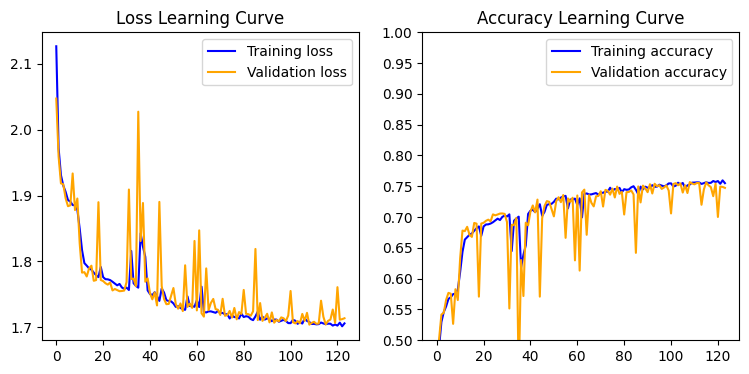

In [21]:
fig = train_model(
    ff1, torch.optim.SGD, 
    optimizer_kwargs=dict(
        lr=0.01
    ),
    epochs=200,
    early_stopper=EarlyStopper(15),
    display_cldw=10
)

We can see that training stopped because it has reached limit of 200 epochs and not due to convergence (early stopping). This issue could be attacked by raising number of epochs, learning rate or using more sophisticated optimizer. First option will most probably take the most time, while second may not yield better results, so we will try different optimizer. Let's try **RMSprop** with alpha **0.95**. Hopefully it will adjust gradients norm and it will be able to slip into optimum faster. 

In [22]:
torch.manual_seed(RND_SEED)
ff1_rms = nn.Sequential(
    nn.Flatten(),
    nn.Linear(LEN_SIDE ** 2, 32),
    nn.ReLU(),
    nn.Linear(32, N_LABELS),
    nn.Softmax(1)
).to(device)
ff1_rms.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=1024, out_features=32, bias=True)
  (2): ReLU()
  (3): Linear(in_features=32, out_features=10, bias=True)
  (4): Softmax(dim=1)
)

| Epoch || Loss                    || Accuracy                |
|       || Training   | Validation || Training   | Validation |
|-------||------------|------------||------------|------------|
|     0 ||  2.2380386 |  2.1958086 ||  0.2230952 |  0.2653333 |
|    10 ||  2.3633414 |  2.3544842 ||  0.0978095 |  0.1066667 |
|    20 ||  2.3633414 |  2.3544842 ||  0.0978095 |  0.1066667 |
| Early Stopping |---------------------------------------------|
|    25 ||  2.3633414 |  2.3544842 ||  0.0978095 |  0.1066667 |


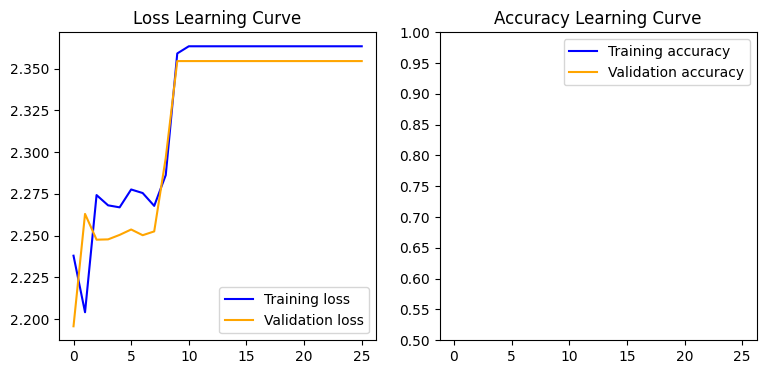

In [23]:
_ = train_model(
    ff1_rms, torch.optim.RMSprop,
    optimizer_kwargs=dict(
        lr=0.01,
        alpha=0.95
    ),
    epochs=200,
    early_stopper=EarlyStopper(25),
    display_cldw=10
)

We can see that almost no change has been made over first 25 epochs. It is likely that gradient got zeroed out. We will address this problem by using standardized dataset. Later we will try activation functions that have large support for gradient.

| Epoch || Loss                    || Accuracy                |
|       || Training   | Validation || Training   | Validation |
|-------||------------|------------||------------|------------|
|     0 ||  2.0711643 |  1.9607192 ||  0.3889048 |  0.4994286 |
|    25 ||  1.7635911 |  1.7581815 ||  0.6974286 |  0.7028571 |
|    50 ||  1.7531018 |  1.7433848 ||  0.7078571 |  0.7175238 |
|    75 ||  1.7465509 |  1.7436914 ||  0.7144524 |  0.7175238 |
| Early Stopping |---------------------------------------------|
|    90 ||  1.7423620 |  1.7469137 ||  0.7188333 |  0.7137143 |


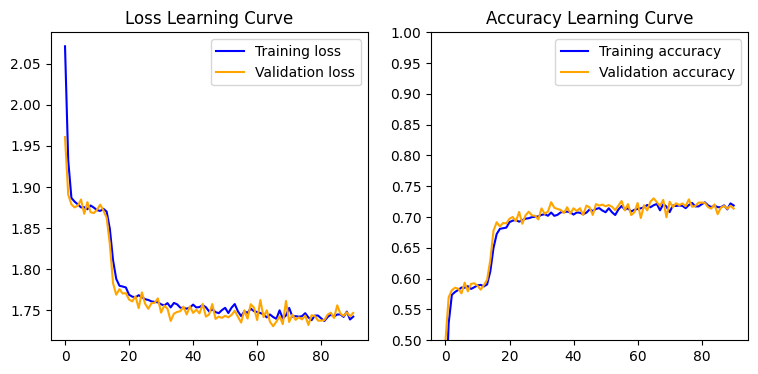

In [24]:
fig = train_model(
    ff1_rms, torch.optim.RMSprop,
    optimizer_kwargs=dict(
        lr=0.01,
        alpha=0.95
    ),
    epochs=200,
    early_stopper=EarlyStopper(25),

    train_loader=train_std_loader,
    val_loader=val_std_loader,
    
    display_cldw=25
)

Model converged, but it shows worse results, so we will need a bigger net for the bigger fish.

### 2 Hidden Layers Net

We will add one more layer to our net and train it using **SGD with momentum 0.05**. It will be trained on standardized dataset, so gradient will less likely be a zero.

In [25]:
torch.manual_seed(RND_SEED)
ff2 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(LEN_SIDE ** 2, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, N_LABELS),
    nn.Softmax(1)
).to(device)
ff2.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=1024, out_features=64, bias=True)
  (2): ReLU()
  (3): Linear(in_features=64, out_features=32, bias=True)
  (4): ReLU()
  (5): Linear(in_features=32, out_features=10, bias=True)
  (6): Softmax(dim=1)
)

| Epoch || Loss                    || Accuracy                |
|       || Training   | Validation || Training   | Validation |
|-------||------------|------------||------------|------------|
|     0 ||  2.2747489 |  2.2307976 ||  0.1728571 |  0.2470476 |
|   100 ||  1.6783792 |  1.6869689 ||  0.7917143 |  0.7815238 |
|   200 ||  1.6538264 |  1.6760199 ||  0.8152143 |  0.7864762 |
|   300 ||  1.6395723 |  1.6710698 ||  0.8289048 |  0.7914286 |
|   400 ||  1.6304945 |  1.6692152 ||  0.8365714 |  0.7918095 |
| Finished |--------------------------------------------------|
|   499 ||  1.6238406 |  1.6677112 ||  0.8424048 |  0.7939048 |


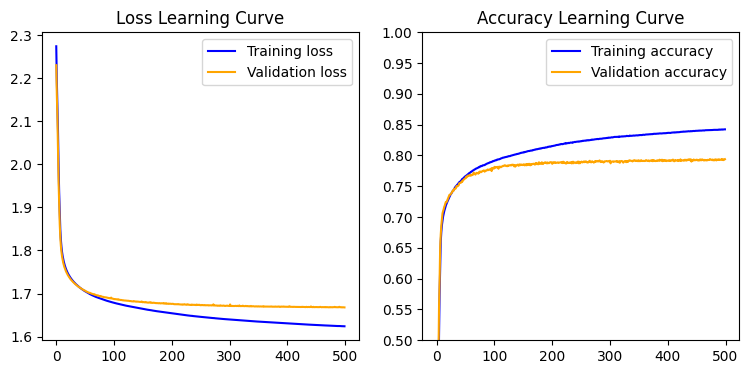

In [26]:
_ = train_model(
    ff2, torch.optim.SGD,
    optimizer_kwargs=dict(
        lr=0.01,
        momentum=0.05
    ),
    epochs=500,
    early_stopper=EarlyStopper(50),

    train_loader=train_std_loader,
    val_loader=val_std_loader,
    
    display_cldw=100
)

This topology shows better results, but once again we were met by slow learning. This time we will both increase number of epochs and use even more sophisticated optimizer, namely **Adam lr=0.001** with first-order coeficient being **0.85** and second-order **0.999**.

In [27]:
torch.manual_seed(RND_SEED)
ff2_adam = nn.Sequential(
    nn.Flatten(),
    nn.Linear(LEN_SIDE ** 2, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, N_LABELS),
    nn.Softmax(1)
).to(device)
ff2_adam.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=1024, out_features=64, bias=True)
  (2): ReLU()
  (3): Linear(in_features=64, out_features=32, bias=True)
  (4): ReLU()
  (5): Linear(in_features=32, out_features=10, bias=True)
  (6): Softmax(dim=1)
)

| Epoch || Loss                    || Accuracy                |
|       || Training   | Validation || Training   | Validation |
|-------||------------|------------||------------|------------|
|     0 ||  1.8168995 |  1.7164750 ||  0.6581429 |  0.7516190 |
|   100 ||  1.5480005 |  1.6275779 ||  0.9137619 |  0.8320000 |
| Early Stopping |---------------------------------------------|
|   148 ||  1.5412708 |  1.6233186 ||  0.9202381 |  0.8373333 |


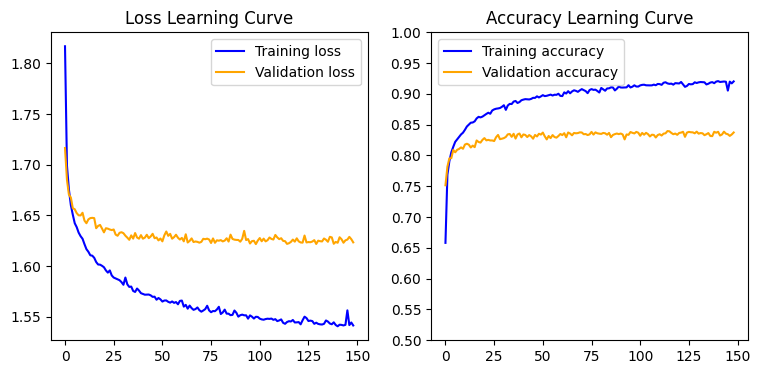

In [28]:
_ = train_model(
    ff2_adam, torch.optim.Adam,
    optimizer_kwargs=dict(
        lr=0.001,
        betas=(0.9, 0.999)
    ),
    epochs=1500,
    early_stopper=EarlyStopper(50),

    train_loader=train_std_loader,
    val_loader=val_std_loader,
    
    display_cldw=100
)

We have converged much faster and achivied the best result yet. But we could benefit from regularization. We will use dropout. Nets with dropout usually take longer to learn, so we will increase tolerance for early stopper. If model will be stuck in local minimum it will take it longer to escape that cavity due to drop out and we want to be patient for that.

In [29]:
torch.manual_seed(RND_SEED)
ff2_adam_do = nn.Sequential(
    nn.Flatten(),
    nn.Dropout(0.1),
    nn.Linear(LEN_SIDE ** 2, 64),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, N_LABELS),
    nn.Softmax(1)
).to(device)
ff2_adam_do.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Dropout(p=0.1, inplace=False)
  (2): Linear(in_features=1024, out_features=64, bias=True)
  (3): ReLU()
  (4): Dropout(p=0.2, inplace=False)
  (5): Linear(in_features=64, out_features=32, bias=True)
  (6): ReLU()
  (7): Linear(in_features=32, out_features=10, bias=True)
  (8): Softmax(dim=1)
)

| Epoch || Loss                    || Accuracy                |
|       || Training   | Validation || Training   | Validation |
|-------||------------|------------||------------|------------|
|     0 ||  1.8963447 |  1.7841328 ||  0.5732857 |  0.6832381 |
|   100 ||  1.6916725 |  1.7065070 ||  0.7688810 |  0.7548571 |
|   200 ||  1.6809701 |  1.7017190 ||  0.7797857 |  0.7588571 |
|   300 ||  1.6759853 |  1.7022661 ||  0.7845952 |  0.7577143 |
|   400 ||  1.6749537 |  1.6974151 ||  0.7858571 |  0.7636190 |
| Early Stopping |---------------------------------------------|
|   417 ||  1.6757183 |  1.7014419 ||  0.7850476 |  0.7590476 |


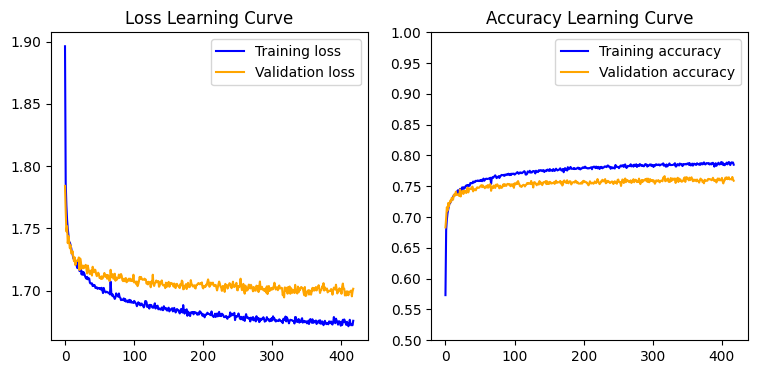

In [30]:
_ = train_model(
    ff2_adam_do, torch.optim.Adam,
    optimizer_kwargs=dict(
        lr=0.001,
        betas=(0.9, 0.999)
    ),
    epochs=1000,
    early_stopper=EarlyStopper(100),

    train_loader=train_std_loader,
    val_loader=val_std_loader,
    
    display_cldw=100
)

Last net was wide, yet not very deep, it had only 2 hidden layers. Let's try its counterpart, deep, but relatively thin network. As networks become deeper risk of gradient explosion or decay becomes more prominent.

### 3 Hidden Layers Net

This time we will use **CELU** instead of **ReLU**. CELU is a continuosly differentiable cousin of SeLU.

In [31]:
torch.manual_seed(RND_SEED)
ff3 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(LEN_SIDE ** 2, 16),
    nn.CELU(),
    nn.Linear(16, 16),
    nn.CELU(),
    nn.Linear(16, 16),
    nn.CELU(),
    nn.Linear(16, N_LABELS),
    nn.Softmax(1)
).to(device)
ff3.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=1024, out_features=16, bias=True)
  (2): CELU(alpha=1.0)
  (3): Linear(in_features=16, out_features=16, bias=True)
  (4): CELU(alpha=1.0)
  (5): Linear(in_features=16, out_features=16, bias=True)
  (6): CELU(alpha=1.0)
  (7): Linear(in_features=16, out_features=10, bias=True)
  (8): Softmax(dim=1)
)

| Epoch || Loss                    || Accuracy                |
|       || Training   | Validation || Training   | Validation |
|-------||------------|------------||------------|------------|
|     0 ||  1.9335079 |  1.7464009 ||  0.5543333 |  0.7386667 |
|   100 ||  1.5972898 |  1.6509869 ||  0.8640476 |  0.8093333 |
| Early Stopping |---------------------------------------------|
|   189 ||  1.5856648 |  1.6508969 ||  0.8758571 |  0.8085714 |


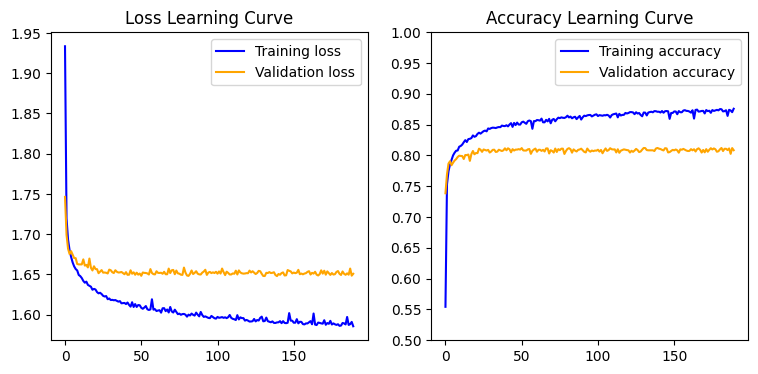

In [32]:
_ = train_model(
    ff3, torch.optim.Adam,
    optimizer_kwargs=dict(
        lr=0.001,
        betas=(0.9, 0.999)
    ),
    epochs=1000,
    early_stopper=EarlyStopper(50),

    train_loader=train_std_loader,
    val_loader=val_std_loader,
    
    display_cldw=100
)

Net has stopped learning after 300 epochs of no improvment. In deep neural networks this can signal decaying gradient. Common solution is to use **Batch Normalization**. Deep networks are also  prone to overfitting, so we will optimize this network with $L^2$ regularization, naive sum of loss and squared $L^2$ norm of weights is a bad idea, because they are on completly different scales. We will use **weight decay** in optimization step for that. SGD supports it out of box, while adaptive optimizers (such as Adam) require additional step of decoupling. Luckily PyTorch implements this feature with **AdamW**.

In [33]:
torch.manual_seed(RND_SEED)
ff3_batch = nn.Sequential(
    nn.Flatten(),
    nn.Linear(LEN_SIDE ** 2, 16),
    nn.CELU(),
    nn.BatchNorm1d(16),
    nn.Linear(16, 16, bias=False),
    nn.CELU(),
    nn.BatchNorm1d(16),
    nn.Linear(16, 16, bias=False),
    nn.CELU(),
    nn.Linear(16, N_LABELS),
    nn.Softmax(1)
).to(device)
ff3_batch.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=1024, out_features=16, bias=True)
  (2): CELU(alpha=1.0)
  (3): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Linear(in_features=16, out_features=16, bias=False)
  (5): CELU(alpha=1.0)
  (6): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Linear(in_features=16, out_features=16, bias=False)
  (8): CELU(alpha=1.0)
  (9): Linear(in_features=16, out_features=10, bias=True)
  (10): Softmax(dim=1)
)

| Epoch || Loss                    || Accuracy                |
|       || Training   | Validation || Training   | Validation |
|-------||------------|------------||------------|------------|
|     0 ||  1.8240624 |  1.7073793 ||  0.6795238 |  0.7651429 |
|   100 ||  1.6087989 |  1.6487942 ||  0.8557619 |  0.8137143 |
|   200 ||  1.6056437 |  1.6437287 ||  0.8584048 |  0.8205714 |
|   300 ||  1.6029669 |  1.6461116 ||  0.8617619 |  0.8156190 |
| Early Stopping |---------------------------------------------|
|   335 ||  1.5994967 |  1.6443070 ||  0.8660000 |  0.8186667 |


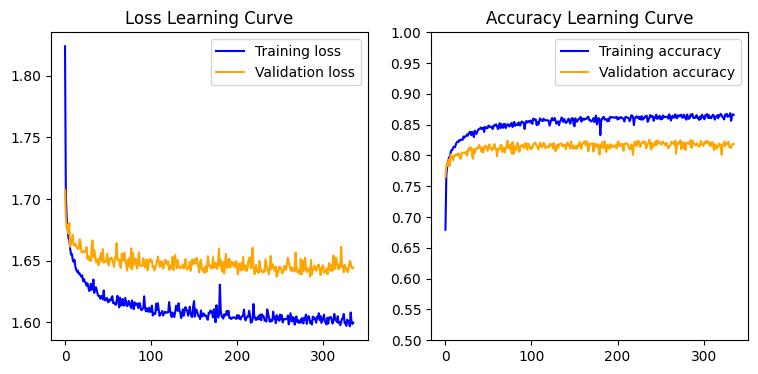

In [34]:
_ = train_model(
    ff3_batch, torch.optim.AdamW,
    optimizer_kwargs=dict(
        lr=0.003,
        betas=(0.9, 0.999),
        weight_decay=0.05
    ),
    epochs=1000,
    early_stopper=EarlyStopper(50),

    train_loader=train_std_loader,
    val_loader=val_std_loader,
    
    display_cldw=100
)

Regularized net with Batch Normalization performed slightly better, though no significant change is made.

## CNN

CNNs are known to be great with images and signals. Convolution layers consist of convolution with learnable bias and kernel weights, activation function and pooling layer (usually maxpool or average pool). One of the benefits of convolutional networks is smaller number of parameters compared to feed-forwards. 

Convolution allows to detect edges and shapes on image, so model is able to extract practical features from image quickly.

### 1 Convolution Net

Let's start with something simple and quick.

In [35]:
torch.manual_seed(RND_SEED)
conv1 = nn.Sequential(
    nn.Conv2d(1, 3, kernel_size=(3,3), padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(3,3)),
    nn.Flatten(),
    nn.Linear(3*10*10,N_LABELS),
    nn.Softmax(1)
).to(device)
conv1.apply(init_weights)

Sequential(
  (0): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(3, 3), stride=(3, 3), padding=0, dilation=1, ceil_mode=False)
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Linear(in_features=300, out_features=10, bias=True)
  (5): Softmax(dim=1)
)

We will train this model on non-standardized dataset with bland SGD.

| Epoch || Loss                    || Accuracy                |
|       || Training   | Validation || Training   | Validation |
|-------||------------|------------||------------|------------|
|     0 ||  2.2957173 |  2.2739340 ||  0.1646429 |  0.1866667 |
|    10 ||  2.2677121 |  2.2669355 ||  0.1929286 |  0.1937143 |
|    20 ||  2.0341286 |  2.0892810 ||  0.4260238 |  0.3712381 |
|    30 ||  1.9453559 |  1.9561697 ||  0.5149048 |  0.5038095 |
|    40 ||  1.8598770 |  1.8579051 ||  0.6009524 |  0.6028571 |
|    50 ||  1.8518833 |  1.8537977 ||  0.6084286 |  0.6066667 |
|    60 ||  1.8454707 |  1.8442290 ||  0.6152381 |  0.6169524 |
|    70 ||  1.8414329 |  1.8427585 ||  0.6186667 |  0.6180952 |
|    80 ||  1.8399046 |  1.8463744 ||  0.6208810 |  0.6146667 |
|    90 ||  1.8371576 |  1.8532444 ||  0.6236190 |  0.6068571 |
|   100 ||  1.8349202 |  1.8383904 ||  0.6257857 |  0.6217143 |
|   110 ||  1.8339869 |  1.8388495 ||  0.6267143 |  0.6215238 |
|   120 ||  1.8331313 |  1.8379927 ||  0

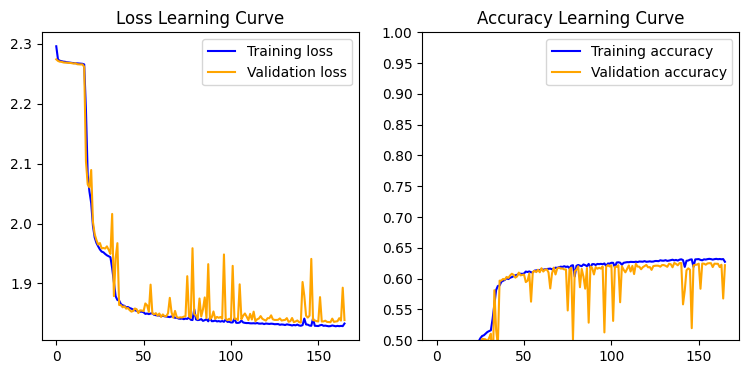

In [36]:
_ = train_model(
    conv1, torch.optim.SGD,
    optimizer_kwargs=dict(
        lr=0.01,
    ),
    epochs=200,
    early_stopper=EarlyStopper(25),
    display_cldw=10
)

It looks like we have either a gradient explosion problem or it takes too long to learn. We will use standardized dataset from now on. We will also try **SGD with nesterov momentum**. Nesterov momentum differs from classical one in that it computes gradient with which velocity vector is updated not at the current position, but at a "next step" point. It allows it to be more stable than its classical counterpart, but makes training longer.

In [37]:
torch.manual_seed(RND_SEED)
conv1_nest = nn.Sequential(
    nn.Conv2d(1, 3, kernel_size=(3,3), padding=1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(3,3)),
    nn.Flatten(),
    nn.Linear(3*10*10,N_LABELS),
    nn.Softmax(1)
).to(device)
conv1_nest.apply(init_weights)

Sequential(
  (0): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(3, 3), stride=(3, 3), padding=0, dilation=1, ceil_mode=False)
  (3): Flatten(start_dim=1, end_dim=-1)
  (4): Linear(in_features=300, out_features=10, bias=True)
  (5): Softmax(dim=1)
)

| Epoch || Loss                    || Accuracy                |
|       || Training   | Validation || Training   | Validation |
|-------||------------|------------||------------|------------|
|     0 ||  2.3022478 |  2.2894833 ||  0.0950952 |  0.1392381 |
|    50 ||  1.7806425 |  1.7882512 ||  0.6923095 |  0.6819048 |
|   100 ||  1.7517454 |  1.7610639 ||  0.7172857 |  0.7080000 |
|   150 ||  1.7390631 |  1.7496982 ||  0.7288810 |  0.7146667 |
|   200 ||  1.7312261 |  1.7467083 ||  0.7363095 |  0.7209524 |
|   250 ||  1.7254069 |  1.7405915 ||  0.7415000 |  0.7260952 |
|   300 ||  1.7209312 |  1.7372077 ||  0.7457619 |  0.7281905 |
|   350 ||  1.7174055 |  1.7366440 ||  0.7498095 |  0.7285714 |
|   400 ||  1.7146298 |  1.7351435 ||  0.7527381 |  0.7268571 |
|   450 ||  1.7121763 |  1.7337303 ||  0.7549048 |  0.7293333 |
|   500 ||  1.7103237 |  1.7320833 ||  0.7564048 |  0.7300952 |
|   550 ||  1.7085618 |  1.7333129 ||  0.7587143 |  0.7285714 |
| Early Stopping |----------------------

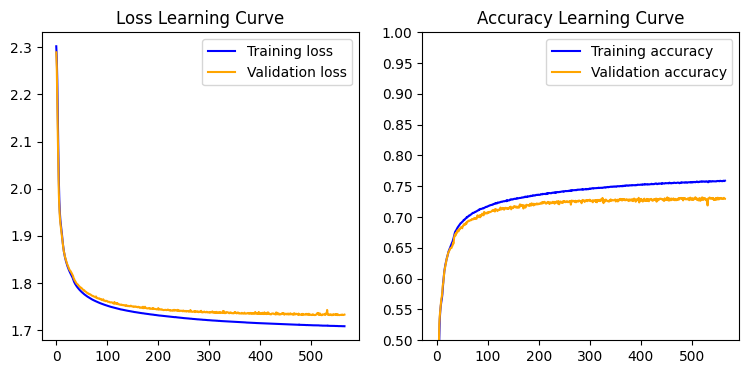

In [38]:
_ = train_model(
    conv1_nest, torch.optim.SGD,
    optimizer_kwargs=dict(
        lr=0.01,
        momentum=0.05,
        nesterov=True
    ),
    epochs=1000,
    early_stopper=EarlyStopper(25),

    train_loader=train_std_loader,
    val_loader=val_std_loader,
    
    display_cldw=50
)

We were able to achieve good results with very shallow net, let's try deeper net and beat feed forward.

### 2 Convolution & 1 Fully-Connected Layers Net

We will use **SiLU** (Sigmoid activation function) and **Average Pool** in convolution layers. One of the main benefits of SiLU is that it has large support for gradient (gradient is equal to zero only at one point). In fully-connected layer we will use **GELU** it is very similiar to SiLU, both of them are identity multiplied, by an S-shaped function, SiLU is $x \cdot \sigma(x)$, where $\sigma(x)$ is logistic sigmoid, and GELU is $x \cdot \Phi(x)$, where $\Phi(x)$ is cdf of standard normal distribution.

In [39]:
torch.manual_seed(RND_SEED)
conv2 = nn.Sequential(
    nn.Conv2d(1, 8, kernel_size=(2,2), padding=1),
    nn.SiLU(),
    nn.AvgPool2d(kernel_size=2, padding=1),
    
    nn.Conv2d(8, 16, kernel_size=(2,2), padding=1),
    nn.SiLU(),
    nn.AvgPool2d(kernel_size=2, padding=1),
    
    nn.Flatten(),
    nn.Linear(16*10*10, 16),
    nn.GELU(),

    nn.Linear(16, N_LABELS),
    nn.Softmax(1)
).to(device)
conv2.apply(init_weights)

Sequential(
  (0): Conv2d(1, 8, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (1): SiLU()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=1)
  (3): Conv2d(8, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (4): SiLU()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=1)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=1600, out_features=16, bias=True)
  (8): GELU(approximate='none')
  (9): Linear(in_features=16, out_features=10, bias=True)
  (10): Softmax(dim=1)
)

| Epoch || Loss                    || Accuracy                |
|       || Training   | Validation || Training   | Validation |
|-------||------------|------------||------------|------------|
|     0 ||  1.9371141 |  1.7585614 ||  0.5449762 |  0.7099048 |
|    25 ||  1.6329581 |  1.6420425 ||  0.8301429 |  0.8186667 |
|    50 ||  1.6167106 |  1.6279678 ||  0.8453571 |  0.8329524 |
|    75 ||  1.6063279 |  1.6278110 ||  0.8557143 |  0.8342857 |
|   100 ||  1.5953835 |  1.6270808 ||  0.8675238 |  0.8327619 |
|   125 ||  1.5896248 |  1.6188660 ||  0.8729524 |  0.8420952 |
|   150 ||  1.5829177 |  1.6186444 ||  0.8797143 |  0.8400000 |
|   175 ||  1.5752114 |  1.6146993 ||  0.8873810 |  0.8462857 |
|   200 ||  1.5712827 |  1.6189983 ||  0.8907381 |  0.8417143 |
|   225 ||  1.5682198 |  1.6143352 ||  0.8939286 |  0.8455238 |
|   250 ||  1.5643064 |  1.6154090 ||  0.8981667 |  0.8449524 |
| Early Stopping |---------------------------------------------|
|   260 ||  1.5641049 |  1.6118646 ||  

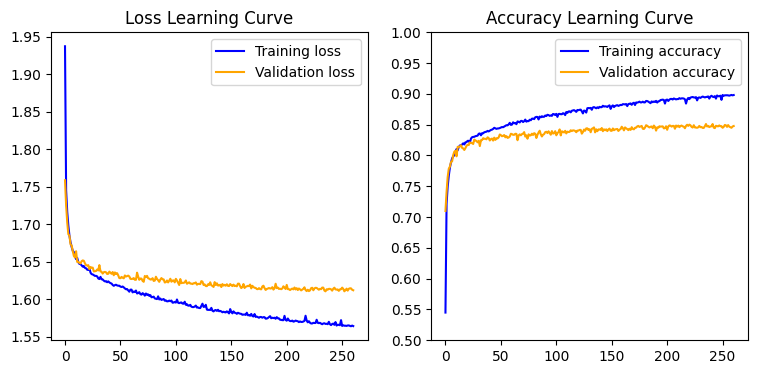

In [40]:
_ = train_model(
    conv2, torch.optim.Adam,
    optimizer_kwargs=dict(
        lr=0.001
    ),
    epochs=750,
    early_stopper=EarlyStopper(25),

    train_loader=train_std_loader,
    val_loader=val_std_loader,
    
    display_cldw=25
)

With this setup we were able to break previous champion's score. If we look carefully we can see that last 100 epochs made no change to validation loss. Let's use Batch Norm to speed up the training.

In [41]:
torch.manual_seed(RND_SEED)
conv2_batch = nn.Sequential(
    nn.Conv2d(1, 8, kernel_size=(2,2), padding=1),
    nn.SiLU(),
    nn.AvgPool2d(kernel_size=2, padding=1),
    
    nn.Conv2d(8, 16, kernel_size=(2,2), padding=1),
    nn.SiLU(),
    nn.AvgPool2d(kernel_size=2, padding=1),
    
    nn.Flatten(),

    nn.BatchNorm1d(16*10*10),
    nn.Linear(16*10*10, 16),
    nn.GELU(),

    nn.Linear(16, N_LABELS),
    nn.Softmax(1)
).to(device)
conv2_batch

Sequential(
  (0): Conv2d(1, 8, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (1): SiLU()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=1)
  (3): Conv2d(8, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (4): SiLU()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=1)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): BatchNorm1d(1600, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Linear(in_features=1600, out_features=16, bias=True)
  (9): GELU(approximate='none')
  (10): Linear(in_features=16, out_features=10, bias=True)
  (11): Softmax(dim=1)
)

| Epoch || Loss                    || Accuracy                |
|       || Training   | Validation || Training   | Validation |
|-------||------------|------------||------------|------------|
|     0 ||  1.8873654 |  1.7551618 ||  0.6033571 |  0.7293333 |
|    50 ||  1.6143121 |  1.6309552 ||  0.8486190 |  0.8316190 |
|   100 ||  1.5567867 |  1.6001823 ||  0.9065238 |  0.8596190 |
|   150 ||  1.5436835 |  1.5926084 ||  0.9189286 |  0.8678095 |
| Early Stopping |---------------------------------------------|
|   184 ||  1.5387534 |  1.5940142 ||  0.9234762 |  0.8664762 |


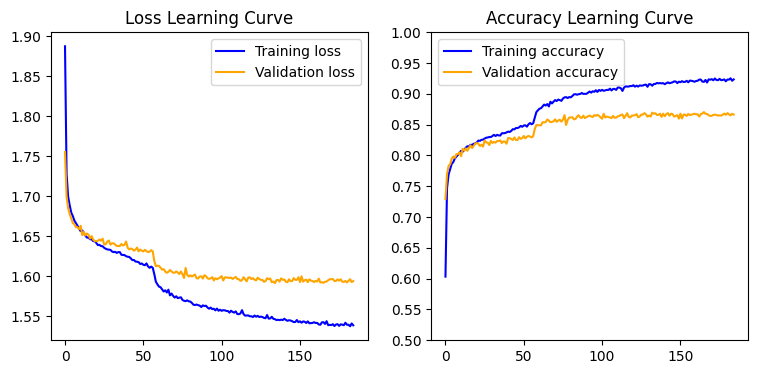

In [42]:
_ = train_model(
    conv2_batch, torch.optim.Adam,
    optimizer_kwargs=dict(
        lr=0.001,
    ),
    epochs=750,
    early_stopper=EarlyStopper(50),

    train_loader=train_std_loader,
    val_loader=val_std_loader,
    
    display_cldw=50
)

Batch Norm gave us the best best model yet. After a step on 50th epoch training loss went lower, while validation loss remained almost unchanged. Let's try $L^2$ regularization. Once again we will use weight decay.

In [43]:
torch.manual_seed(RND_SEED)
conv2_batch_l2 = nn.Sequential(
    nn.Conv2d(1, 8, kernel_size=(2,2), padding=1),
    nn.SiLU(),
    nn.AvgPool2d(kernel_size=2, padding=1),
    
    nn.Conv2d(8, 16, kernel_size=(2,2), padding=1),
    nn.SiLU(),
    nn.AvgPool2d(kernel_size=2, padding=1),
    
    nn.Flatten(),

    nn.BatchNorm1d(16*10*10),
    nn.Linear(16*10*10, 16),
    nn.GELU(),

    nn.Linear(16, N_LABELS),
    nn.Softmax(1)
).to(device)
conv2_batch_l2

Sequential(
  (0): Conv2d(1, 8, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (1): SiLU()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=1)
  (3): Conv2d(8, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (4): SiLU()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=1)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): BatchNorm1d(1600, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): Linear(in_features=1600, out_features=16, bias=True)
  (9): GELU(approximate='none')
  (10): Linear(in_features=16, out_features=10, bias=True)
  (11): Softmax(dim=1)
)

| Epoch || Loss                    || Accuracy                |
|       || Training   | Validation || Training   | Validation |
|-------||------------|------------||------------|------------|
|     0 ||  1.8876964 |  1.7555636 ||  0.6032143 |  0.7287619 |
|    25 ||  1.6365405 |  1.6424788 ||  0.8278333 |  0.8205714 |
|    50 ||  1.5831125 |  1.6043018 ||  0.8843571 |  0.8620952 |
|    75 ||  1.5698153 |  1.6022219 ||  0.8985714 |  0.8594286 |
|   100 ||  1.5612283 |  1.6029408 ||  0.9074762 |  0.8596190 |
|   125 ||  1.5554890 |  1.5997844 ||  0.9134762 |  0.8634286 |
|   150 ||  1.5513447 |  1.5998287 ||  0.9182619 |  0.8624762 |
|   175 ||  1.5483284 |  1.5979994 ||  0.9213810 |  0.8668571 |
|   200 ||  1.5467639 |  1.5993681 ||  0.9230476 |  0.8628571 |
|   225 ||  1.5443501 |  1.5996369 ||  0.9256667 |  0.8628571 |
| Early Stopping |---------------------------------------------|
|   230 ||  1.5452195 |  1.6042067 ||  0.9242857 |  0.8577143 |


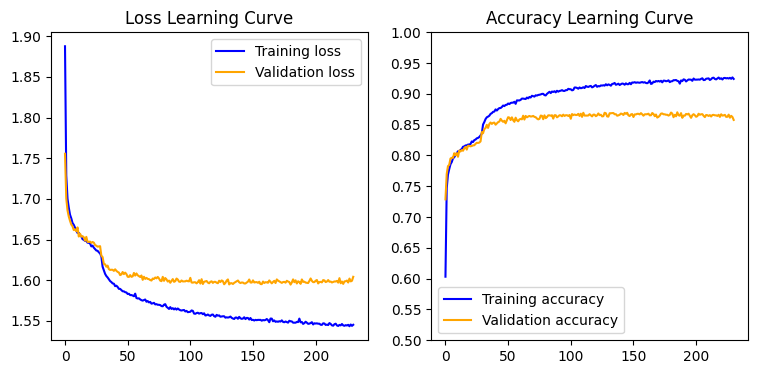

In [44]:
_ = train_model(
    conv2_batch_l2, torch.optim.AdamW,
    optimizer_kwargs=dict(
        lr=0.001,
        weight_decay=0.05
    ),
    epochs=750,
    early_stopper=EarlyStopper(50),

    train_loader=train_std_loader,
    val_loader=val_std_loader,
    
    display_cldw=25
)

We were not able to achieve better results.

### 2 Convolution & 2 Fully-connected Layers Net

Let's make a wide net, that will be able to catch many different intercations between pixels. Larger nets usually are highly prone to overfiting, so we will use **Dropout** regularization and **Batch Norm** to train it. For activation functions we have chosen **LeakyReLU**.

In [45]:
torch.manual_seed(RND_SEED)
conv3 = nn.Sequential(
    nn.Conv2d(1, 64, kernel_size=3, padding=1),
    nn.LeakyReLU(),
    nn.MaxPool2d(kernel_size=2, padding=1),

    nn.LazyBatchNorm2d(),
    nn.Conv2d(64, 128, kernel_size=3, padding=1, bias=False),
    nn.LeakyReLU(),
    nn.MaxPool2d(kernel_size=2, padding=1),
    
    nn.Flatten(),

    nn.Dropout(0.2),
    nn.BatchNorm1d(128 * 9 * 9),
    nn.Linear(128 * 9 * 9, 512, bias=False),
    nn.LeakyReLU(),

    nn.Dropout(0.2),
    nn.BatchNorm1d(512),
    nn.Linear(512, 256, bias=False),
    nn.LeakyReLU(),

    nn.Dropout(0.2),
    nn.Linear(256, N_LABELS),
    nn.Softmax(1)
).to(device)
conv3.apply(init_weights)

Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): LeakyReLU(negative_slope=0.01)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (3): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (5): LeakyReLU(negative_slope=0.01)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (7): Flatten(start_dim=1, end_dim=-1)
  (8): Dropout(p=0.2, inplace=False)
  (9): BatchNorm1d(10368, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Linear(in_features=10368, out_features=512, bias=False)
  (11): LeakyReLU(negative_slope=0.01)
  (12): Dropout(p=0.2, inplace=False)
  (13): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): Linear(in_features=512, out_features=256, bias=False)
  (15): LeakyReLU(negative_slope=0.01)
  

We will train this neural net with Adam, because training such a monster of computation with SGD or RMSprop will take forever. We will also utilize learning rate scheduler, so if it oscilates near minimum, learning rate will be decreased and net will have a chance to approach it.

| Epoch || Loss                    || Accuracy                |
|       || Training   | Validation || Training   | Validation |
|-------||------------|------------||------------|------------|
|     0 ||  1.6953166 |  1.6402384 ||  0.7702381 |  0.8207619 |
|    10 ||  1.5724415 |  1.5844639 ||  0.8886905 |  0.8758095 |
|    20 ||  1.5523975 |  1.5809465 ||  0.9085000 |  0.8798095 |
|    30 ||  1.5284142 |  1.5630313 ||  0.9322857 |  0.8979048 |
|    40 ||  1.5212403 |  1.5605941 ||  0.9400000 |  0.9007619 |
|    50 ||  1.5160746 |  1.5611015 ||  0.9449286 |  0.8996190 |
|    60 ||  1.5142369 |  1.5604934 ||  0.9470952 |  0.9005714 |
|    70 ||  1.5134532 |  1.5600864 ||  0.9475238 |  0.9003810 |
|    80 ||  1.5135368 |  1.5613498 ||  0.9476429 |  0.8990476 |
|    90 ||  1.5134283 |  1.5575530 ||  0.9479286 |  0.9032381 |
|   100 ||  1.5141331 |  1.5607098 ||  0.9470952 |  0.8998095 |
|   110 ||  1.5134366 |  1.5610229 ||  0.9478333 |  0.8996190 |
|   120 ||  1.5138690 |  1.5578946 ||  0

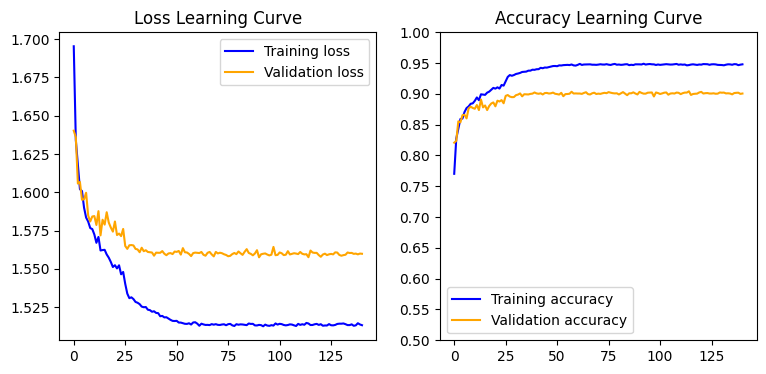

In [46]:
_ = train_model(
    conv3, torch.optim.Adam,
    optimizer_kwargs=dict(
        lr=0.001
    ),
    epochs=750,
    early_stopper=EarlyStopper(50),

    train_loader=train_std_loader,
    val_loader=val_std_loader,

    lr_scheduler_cls=torch.optim.lr_scheduler.ReduceLROnPlateau,
    lr_scheduler_kwargs=dict(
        cooldown=10,
        factor=0.07,
        eps=1e-16,
        threshold=1e-3
    ),
    lr_sch_pass_val_loss=True,
    
    display_cldw=10
)


We have finally got past $90\%$ mark.

## Testing

Last model (A convolutional net without pooling layers and regularized by Dropout, trained on standardized dataset) has shown to be the best.

In [47]:
model = conv3.eval()
model

Sequential(
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): LeakyReLU(negative_slope=0.01)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (5): LeakyReLU(negative_slope=0.01)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (7): Flatten(start_dim=1, end_dim=-1)
  (8): Dropout(p=0.2, inplace=False)
  (9): BatchNorm1d(10368, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Linear(in_features=10368, out_features=512, bias=False)
  (11): LeakyReLU(negative_slope=0.01)
  (12): Dropout(p=0.2, inplace=False)
  (13): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): Linear(in_features=512, out_features=256, bias=False)
  (15): LeakyReLU(negative_slope=0.01)
  (16

Let's count how many parameters does it have.

In [48]:
total_params = 0
for layer in model.parameters():
    total_params += torch.numel(layer)
print(f"Total number of parameters: {total_params}")

Total number of parameters: 5538314


We have 5.5 million parameters. If we did not use dropout we would be very likely to overfit dataset.

We have trained our neural net on standardized dataset, so we need to standardize test dataset as well. Note that we will use training mean and standard deviation, otherwise we would alter our model.

In [49]:
Xtest_std = (Xtest - Xtrain.mean()) / Xtrain.std()
Xtest_std.head(2)

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1015,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024
27894,-0.587228,-0.587228,-0.587228,-0.587228,-0.587228,-0.587221,-0.587244,-0.587241,-0.58735,-0.584736,...,-0.470107,-0.518368,-0.46489,-0.485731,-0.553103,-0.585849,-0.587153,-0.587234,-0.587228,-0.587228
27090,-0.587228,-0.587228,-0.587228,-0.587228,-0.587228,-0.587221,-0.587244,-0.587241,-0.58735,-0.584736,...,-0.470107,-0.518368,-0.46489,-0.485731,-0.553103,-0.585849,-0.587153,-0.587234,-0.587228,-0.587228


Let's transform this dataframe into PyTorch tensor.

In [50]:
Xtest_tensor = torch.tensor(Xtest_std.values.reshape(-1, 1, 32, 32), dtype=torch.float).to(device)
ytest_tensor = torch.tensor(ytest.values, dtype=torch.long).to(device)
print(f"Test data tensor:\n{Xtest_tensor[:2]}\nShape: {Xtest_tensor.shape}\n")
print(f"Test labels tensor:\n{ytest_tensor}\nSahpe: {ytest_tensor.shape}")

Test data tensor:
tensor([[[[-0.5872, -0.5872, -0.5872,  ..., -0.5872, -0.5872, -0.5872],
          [-0.5872, -0.5872, -0.5872,  ..., -0.5873, -0.5872, -0.5872],
          [-0.5872, -0.5872, -0.5835,  ..., -0.5668, -0.5862, -0.5872],
          ...,
          [-0.5872, -0.5551, -0.3849,  ..., -0.4155, -0.5617, -0.5873],
          [-0.5872, -0.5869, -0.5184,  ..., -0.5747, -0.5871, -0.5872],
          [-0.5872, -0.5872, -0.5872,  ..., -0.5872, -0.5872, -0.5872]]],


        [[[-0.5872, -0.5872, -0.5872,  ..., -0.5872, -0.5872, -0.5872],
          [-0.5872, -0.5872, -0.5872,  ..., -0.5873, -0.5872, -0.5872],
          [-0.5872, -0.5872, -0.5835,  ..., -0.5668, -0.5862, -0.5872],
          ...,
          [-0.5872, -0.5551, -0.3849,  ..., -0.4155, -0.5617, -0.5873],
          [-0.5872, -0.5869, -0.5184,  ..., -0.5747, -0.5871, -0.5872],
          [-0.5872, -0.5872, -0.5872,  ..., -0.5872, -0.5872, -0.5872]]]],
       device='cuda:0')
Shape: torch.Size([5250, 1, 32, 32])

Test labels tensor:

Now let's make a prediction on test dataset and estimate accuracy on new data.

In [51]:
pred, pred_proba = None, None
with torch.no_grad():
    pred_proba = model(Xtest_tensor)
    pred = pred_proba.argmax(dim=1)
print(f"Predictions: {pred}")
print(f"Shape: {pred.shape}")

accuracy = (pred == ytest_tensor).float().mean()
print(accuracy)

Predictions: tensor([3, 1, 5,  ..., 0, 9, 3], device='cuda:0')
Shape: torch.Size([5250])
tensor(0.9032, device='cuda:0')


Test accuracy is $90.3\%$ close to validation accuracy, so we would estimate evaluation accuracy to be closer to $90\%$ too.

## Evaluation

Let's read evaluation dataset.

In [52]:
eval_df = pd.read_csv('evaluate.csv')
IDeval = eval_df['ID']
Xeval = eval_df.drop(columns=['ID'])
Xeval.head(3)

,pix1,pix2,pix3,pix4,pix5,pix6,pix7,pix8,pix9,pix10,...,pix1015,pix1016,pix1017,pix1018,pix1019,pix1020,pix1021,pix1022,pix1023,pix1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Before we plug it into our model we need to standardized it. Again we will use training moments for that.

In [53]:
Xeval_std = (Xeval - Xtrain.mean()) / Xtrain.std()

Now we can transform it into tensor and run our model on it.

In [54]:
Xeval_tensor = torch.tensor(Xeval_std.values.reshape(-1, 1, 32, 32), dtype=torch.float).to(device)
pred_proba = None
pred = None
with torch.no_grad():
    pred_proba = model(Xeval_tensor)
    pred = pred_proba.argmax(dim=1).cpu().numpy()

Let's display several of our predictions.

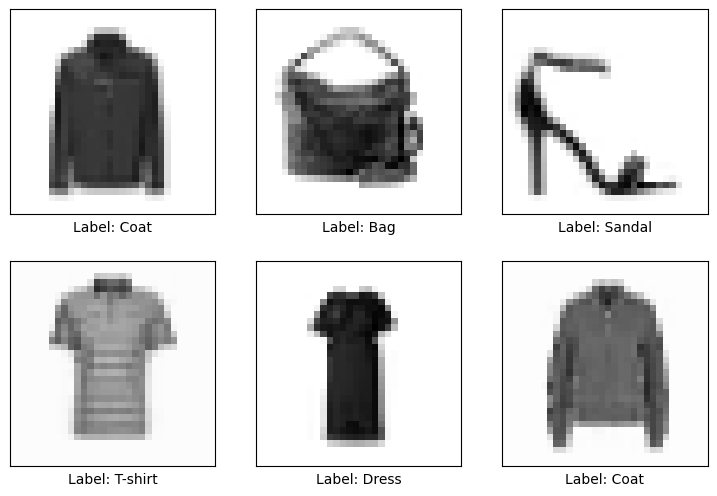

In [55]:
display_gallery(Xeval.head(6), pred[:6])

We might have misclassified 3rd image into sandal, but everything else looks correct. Let's save our predictions.

In [56]:
results = pd.DataFrame({
    'ID' : IDeval,
    'label' : pred
})
results.to_csv('results.csv', index=False)
results

,ID,label
0,0,4
1,1,8
2,2,5
3,3,0
4,4,3
...,...,...
17495,17495,8
17496,17496,6
17497,17497,2
17498,17498,9
